In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
color_pal = sns.color_palette("pastel")

In [39]:
try:
    df = pd.read_csv("data/insurance.csv")
except:
    df = pd.read_csv("https://raw.githubusercontent.com/ysntrkc/ai-summer-camp-proje-1/main/insurance.csv?token=GHSAT0AAAAAABWZWGRUB2YJCDNZCWBUEPP6YYAXZTA")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [42]:
# smoker verisini one-hot encode yapma
df_ohe = pd.get_dummies(df[["smoker"]])
df = pd.concat([df, df_ohe], axis=1)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


# **Keşifsel Veri Analizi**

## BMI Dağılımının İncelenmesi

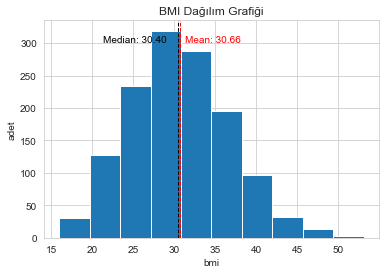

In [44]:
# bmi dağılımı inceleme
bmi = df["bmi"]
plt.hist(bmi)
plt.xlabel("bmi")
plt.ylabel("adet")
plt.title("BMI Dağılım Grafiği")
plt.axvline(bmi.mean(), color='r', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(bmi.mean()*1.02, max_ylim*0.9, 'Mean: {:.2f}'.format(bmi.mean()), color="r")

plt.axvline(bmi.median(), color='k', linestyle='dashed', linewidth=1)
plt.text(bmi.median()*0.7, max_ylim*0.9, 'Median: {:.2f}'.format(bmi.median()), color="k")
plt.show()

**Sonuç:** BMI verisinin dağılımını incelediğimiz zaman normal dağılıma çok yakın bir şekli olduğunu görüyoruz.

## Smoker ile Charges Sütunları Arasındaki İlişkinin İncelenmesi

C:\Users\yasin\AppData\Local\Temp\ipykernel_8020\2867483193.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


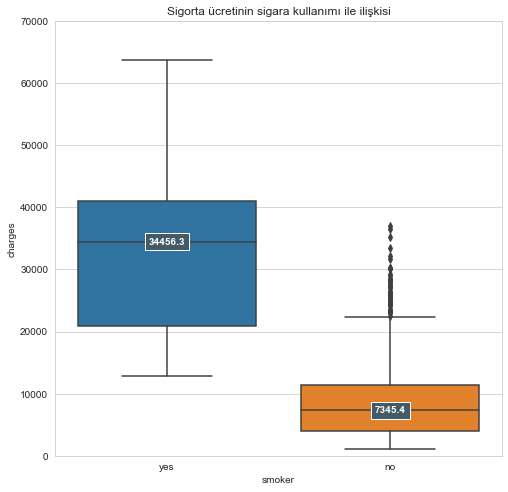

In [45]:
# smoker ile charges arasındaki ilişki incleme - box plot ile
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(ylim=(0, 70000))
box_plot = sns.boxplot(data=df, x="smoker", y="charges", ax=ax)
plt.title("Sigorta ücretinin sigara kullanımı ile ilişkisi")

medians = df.groupby(["smoker"])["charges"].median()
vertical_offset = df['charges'].median() * 0.05

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

fig.show()

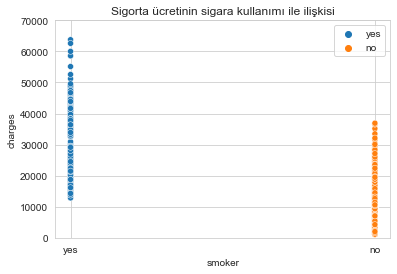

In [46]:
# smoker ile charges arasındaki ilişki incleme - scatter plot ile
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
ax.set(ylim=(0, 70000))
sns.scatterplot(data=df,
                y="charges",
                x="smoker",
                hue="smoker")
plt.title("Sigorta ücretinin sigara kullanımı ile ilişkisi")
plt.legend(loc="upper right")
plt.show()

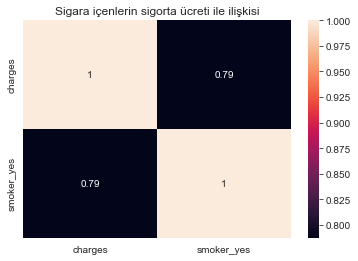

In [47]:
# smoker ile charges arasındaki ilişki incleme - correlation matrix ile
corr_matrix_sc = df[["charges", "smoker_yes"]].corr()
sns.heatmap(corr_matrix_sc, annot=True)
plt.title("Sigara içenlerin sigorta ücreti ile ilişkisi")
plt.show()

**Sonuç:** Smoker ile Charges arasındaki ilişkiyi inceldiğimizde, sigara kullananların sigorta ücreti ortalamasının daha yüksek olduğunu görmekteyiz. Korelasyonlarına baktığımızda da bunun yüksek olduğunu görebiliriz.

## Smoker ile Region Sütunları Arasındaki İlişkinin İncelenmesi

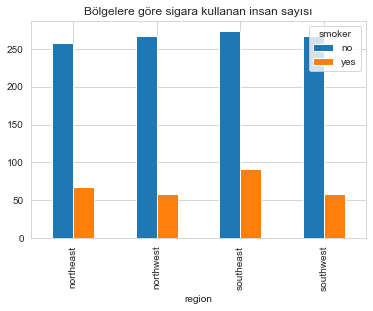

In [48]:
# smoker ile region arasındaki ilişki inceleme - bar plot ile
crosstab_result = pd.crosstab(index=df["region"], columns=df["smoker"])
crosstab_result.plot(kind="bar")
plt.title("Bölgelere göre sigara kullanan insan sayısı")
plt.show()

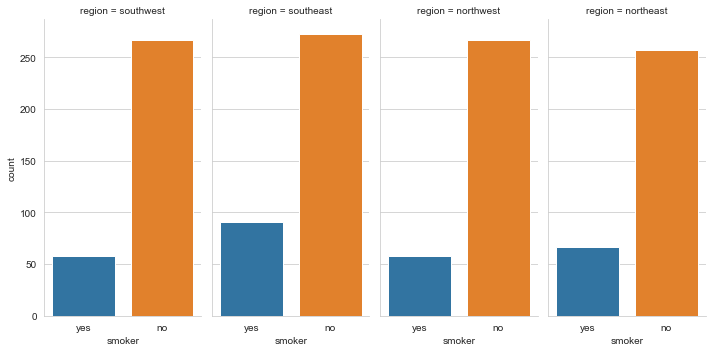

In [49]:
# smoker ile region arasındaki ilişki inceleme - cat plot ile
sns.set_style('whitegrid')
sns.catplot(x='smoker', col='region', data=df, kind='count', aspect=0.5)
plt.show()

**Sonuç:** Bölgelere göre sigara kullanım oranında çok büyük bir değişiklik görülmemektedir.

## BMI ile Sex Sütunları Arasındaki İlişkinin İncelenmesi

C:\Users\yasin\AppData\Local\Temp\ipykernel_8020\1747018469.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


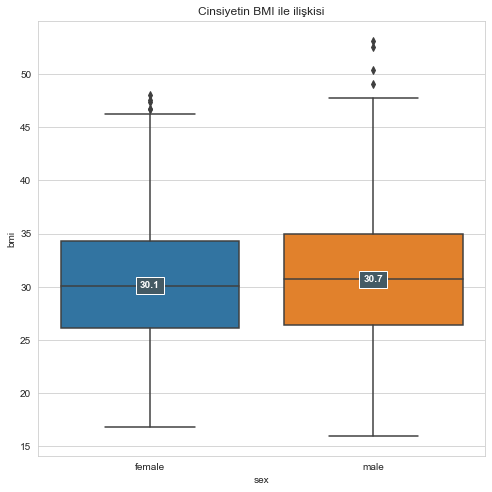

In [50]:
# bmi ile sex arasındaki ilişki incleme - box plot ile
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))
box_plot = sns.boxplot(data=df, x="sex", y="bmi", ax=ax)
plt.title("Cinsiyetin BMI ile ilişkisi")

medians = df.groupby(["sex"])["bmi"].median()
vertical_offset = df['bmi'].median() * 0.05

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

fig.show()

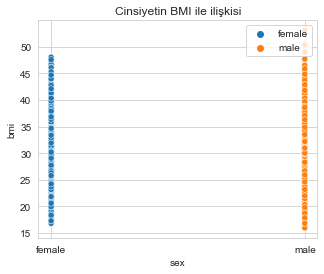

In [51]:
# sex ile bmi arasındaki ilişki incleme - scatter plot ile
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot(data=df,
                y="bmi",
                x="sex",
                hue="sex")
plt.title("Cinsiyetin BMI ile ilişkisi")
plt.legend(loc="upper right")
plt.show()

**Sonuç:** Farklı cinsiyetlerin BMI ortalamaları arasında çok küçük bir fark görülmektedir. Bu sebepten de BMI ile cinsiyet arasında bir ilişki olmadığını söyleyebiliriz.

## En Çok Çocuğa Sahip Bölgeyi Bulma

In [52]:
df_children = df[["region", "children"]].groupby(["region"]).sum()
df_children

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


In [53]:
df_children.columns

Index(['children'], dtype='object')

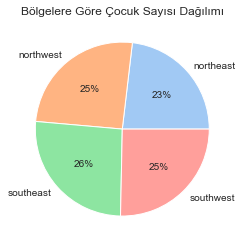

In [54]:
# en çok children olan region bulma - pie chart ile
df_children = df[["region", "children"]].groupby(["region"]).sum()
plt.pie(df_children.children, 
        colors=color_pal, 
        labels=df_children.index, 
        autopct = '%0.0f%%')
plt.title("Bölgelere Göre Çocuk Sayısı Dağılımı")
plt.show()

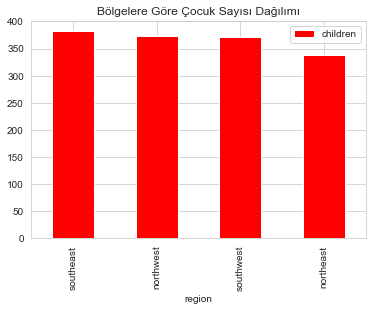

In [55]:
# en çok children olan region bulma - bar plot ile
df_children.sort_values("children", ascending=False).plot(kind="bar", color="r")
plt.title("Bölgelere Göre Çocuk Sayısı Dağılımı")
plt.show()

**Sonuç:** En çok çocuğa sahip bölge 'southeast' bölgesidir.

## Age ile BMI Arasındaki İlişkinin İncelenmesi

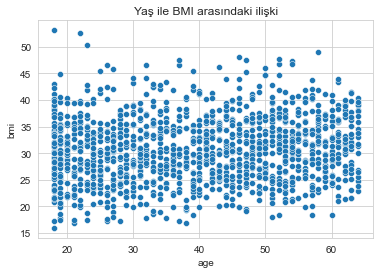

In [56]:
# age ile bmi arasındaki ilişkiyi inceleme - scatter plot ile
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Yaş ile BMI arasındaki ilişki")
plt.show()

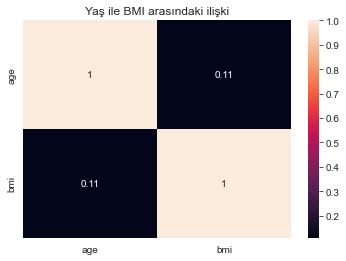

In [57]:
# age ile bmi arasındaki ilişkiyi inceleme - correleation matrix ile
corr_matrix_ab = df[["age", "bmi"]].corr()
sns.heatmap(corr_matrix_ab, annot=True)
plt.title("Yaş ile BMI arasındaki ilişki")
plt.show()

**Sonuç:** Grafiğe baktığımızda yaşa göre BMI dağılımının değişmediğini görmekteyiz. Korelasyonu da çok düşük.

## BMI ile Children Arasındaki İlişki

In [58]:
df_children = df[["bmi", "children"]].groupby(["children"]).mean()

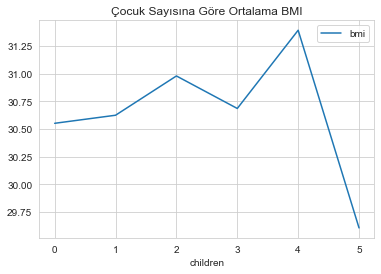

In [59]:
# bmi ile children arasındaki ilişkiyi inceleme - line plot ile
df_children.plot()
plt.title("Çocuk Sayısına Göre Ortalama BMI")
plt.show()

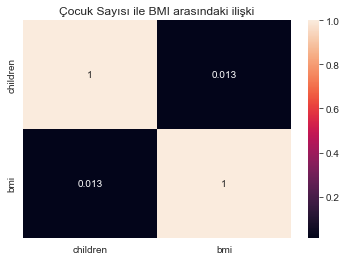

In [60]:
# bmi ile children arasındaki ilişkiyi inceleme - correleation matrix ile
corr_matrix_bchi = df[["children", "bmi"]].corr()
sns.heatmap(corr_matrix_bchi, annot=True)
plt.title("Çocuk Sayısı ile BMI arasındaki ilişki")
plt.show()

**Sonuç:** Çocuk sayısına göre ortalama BMI'lara baktığımız zaman birbirine yakın değerler görmekteyiz. Korelasyonu da çok düşük.

## BMI Değişkeni Outlier İnceleme

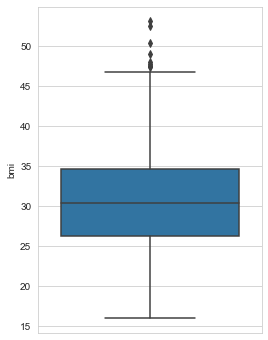

In [61]:
# bmi outlier olma durumu inceleme - box plot ile
fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=df, y="bmi", ax=ax)
plt.show()

**Sonuç:** Grafiği incelediğimizde outlier değerler olduğunu görmekteyiz.

## BMI ile Charges Arasındaki İlişki

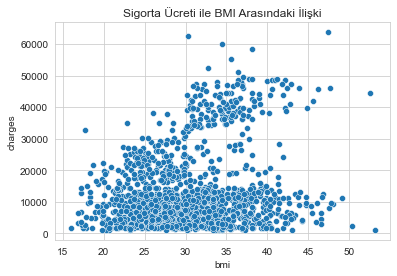

In [62]:
# bmi ile charges arasındaki ilişkiyi inceleme - scatter plot ile
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("Sigorta Ücreti ile BMI Arasındaki İlişki")
plt.show()

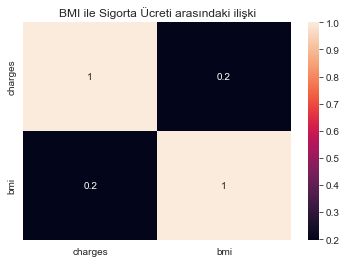

In [63]:
# bmi ile charges arasındaki ilişkiyi inceleme - correlation matrix ile
corr_matrix_bcha = df[["charges", "bmi"]].corr()
sns.heatmap(corr_matrix_bcha, annot=True)
plt.title("BMI ile Sigorta Ücreti arasındaki ilişki")
plt.show()

**Sonuç:** BMI artışı bir bir kısımda sigorta ücretini arttırırken bir kısımda ise değişiklik olmamıştır.

## Region, Smoker ve BMI Arasındaki İlişki 

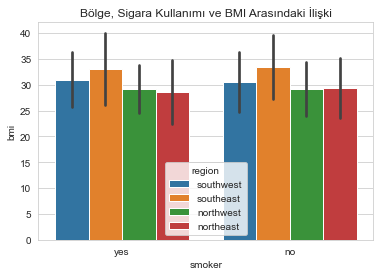

In [64]:
# region, smoker ve bmi arasındaki ilişkiyi inceleme - bar plot ile
sns.barplot(data=df, x="smoker", y="bmi", hue="region", ci="sd")
plt.title("Bölge, Sigara Kullanımı ve BMI Arasındaki İlişki")
plt.show()

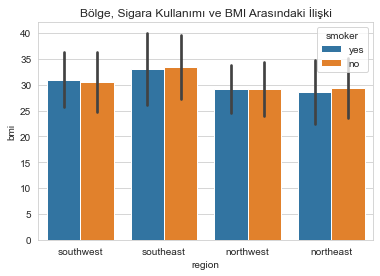

In [65]:
# region, smoker ve bmi arasındaki ilişkiyi inceleme - bar plot ile
sns.barplot(data=df, x="region", y="bmi", hue="smoker", ci="sd")
plt.title("Bölge, Sigara Kullanımı ve BMI Arasındaki İlişki")
plt.show()

**Sonuç:** En yüksek ortalama BMI'a sahip bölge southeast'tir. Southwest bölgesinde sigara kullananların BMI ortalaması daha yüksekken southeast ve northeast bölgelering kullanmayanların BMI ortalaması daha yüksektir. Northwest bölgesinde ise birbirlerine çok yakındır. 